In [206]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

This project is about creating a model for predictiong survival of passengers aboard the sip Titanic. It is part of a competiotion on Kaggle.com 
For this I will be using Logistical regression because it gives outcomes in only 0 - No or 1 - Yes, which can be interpreted in way Did not Survived and Sruvived.

The data has been split into two groups: training set (train.csv) and test set (test.csv)

Overview from Kaggle.com:

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [207]:
titanic_train_df = pd.read_csv("train.csv")
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [208]:
print(titanic_train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [209]:
print(titanic_train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Here we can see all the null values in the dataset. We will compute each missing value in different style. For Age I Will be using classincal approach of using median with that it should be protected from outlier values unlike the mean. Then next is Cabin which will just be turned into classical binary value 1 - has Cabin, 0 - does not have cabin. Lastly there is from which port the given person embarked which will be based on mode value.

In [210]:
print(titanic_train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [211]:
titanic_train_df["Age"] = titanic_train_df["Age"].fillna(titanic_train_df["Age"].median()).round()

In [212]:
print(titanic_train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [213]:
titanic_train_df["Cabin"] = titanic_train_df["Cabin"].apply(lambda x: "0" if pd.isna(x) else "1")

In [214]:
print(titanic_train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


In [215]:
titanic_train_df["Embarked"] = titanic_train_df["Embarked"].fillna(titanic_train_df["Embarked"].mode().iloc[0])

In [216]:
print(titanic_train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [217]:
titanic_train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,1,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


Because regression expects numerical values we need to change the categorical values to numverical. First with gender 0 for Male and 1 for Female. Then using function getDummies creates column for each port from where person could ebarked and fills the specific column with 1 and other with 0. To avoid multicolinearity (where embarking from one port could affect embarking from another if you embark from first we will know you do not embark from the other two, model does not know) the first column is dropped. Also called as One-Hot Encoding and Dummy variable trap. 

In [218]:
titanic_train_df["Sex"] = titanic_train_df["Sex"].apply(lambda x: 0 if x == "male" else 1)  

In [219]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S


In [220]:
titanic_train_df = pd.get_dummies(titanic_train_df, columns=["Embarked"], dtype=int, drop_first=True)  

In [221]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1


Here we come across issue where there is a baby in a dataset. This could affect his survival so creating another column with binary values should cover this issue.

In [222]:
titanic_train_df[titanic_train_df["Age"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
803,804,1,3,"Thomas, Master. Assad Alexander",0,0.0,0,1,2625,8.5167,0,0,0


In [223]:
titanic_train_df["Is_Baby"] = titanic_train_df["Age"].apply(lambda x: 1 if x == 0 else 0)

In [224]:
titanic_train_df[800:810]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Is_Baby
800,801,0,2,"Ponesell, Mr. Martin",0,34.0,0,0,250647,13.0000,0,0,1,0
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",1,31.0,1,1,C.A. 31921,26.2500,0,0,1,0
802,803,1,1,"Carter, Master. William Thornton II",0,11.0,1,2,113760,120.0000,1,0,1,0
803,804,1,3,"Thomas, Master. Assad Alexander",0,0.0,0,1,2625,8.5167,0,0,0,1
804,805,1,3,"Hedman, Mr. Oskar Arvid",0,27.0,0,0,347089,6.9750,0,0,1,0
805,806,0,3,"Johansson, Mr. Karl Johan",0,31.0,0,0,347063,7.7750,0,0,1,0
806,807,0,1,"Andrews, Mr. Thomas Jr",0,39.0,0,0,112050,0.0000,1,0,1,0
807,808,0,3,"Pettersson, Miss. Ellen Natalia",1,18.0,0,0,347087,7.7750,0,0,1,0
808,809,0,2,"Meyer, Mr. August",0,39.0,0,0,248723,13.0000,0,0,1,0
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",1,33.0,1,0,113806,53.1000,1,0,1,0


Next is issue with Fare where there is very high outlier of 512 dollars paid for a fare. As there are not any other values nowhere close this, we can see there has been some místake when keeping or collecting the data therefore capping these values at next possible maximum to not skew the results too much. Better ticket could result in better class and therefore faster arrival towards the life boats and so the surival.

In [225]:
titanic_train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [226]:
titanic_train_df[titanic_train_df["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Is_Baby
179,180,0,3,"Leonard, Mr. Lionel",0,36.0,0,0,LINE,0.0,0,0,1,0
263,264,0,1,"Harrison, Mr. William",0,40.0,0,0,112059,0.0,1,0,1,0
271,272,1,3,"Tornquist, Mr. William Henry",0,25.0,0,0,LINE,0.0,0,0,1,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",0,28.0,0,0,239853,0.0,0,0,1,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",0,19.0,0,0,LINE,0.0,0,0,1,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",0,28.0,0,0,239853,0.0,0,0,1,0
466,467,0,2,"Campbell, Mr. William",0,28.0,0,0,239853,0.0,0,0,1,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",0,28.0,0,0,239854,0.0,0,0,1,0
597,598,0,3,"Johnson, Mr. Alfred",0,49.0,0,0,LINE,0.0,0,0,1,0
633,634,0,1,"Parr, Mr. William Henry Marsh",0,28.0,0,0,112052,0.0,0,0,1,0


Next is an issue with 0 fare, which is not possible but is acrross all classes. Upper 1, Middle 2 and Lower 3 this could also affect survival so I will compute the median of these classes and add it instead of 0. So that the price of ticket is closer to the value others in the same class paid.

In [227]:
titanic_train_df["Fare"] = titanic_train_df.groupby("Pclass")["Fare"].transform(lambda x: x.replace(0, x.median()))

In [228]:
titanic_train_df["Fare"].describe()

count    891.000000
mean      32.674620
std       49.608084
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [229]:
titanic_train_df[titanic_train_df["Fare"] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Is_Baby
258,259,1,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,0,0,0,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,1,0,0,0
737,738,1,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,1,0,0,0


In [230]:
top_10_largest_fares = titanic_train_df["Fare"].nlargest(10)
top_10_largest_fares

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
341    263.0000
438    263.0000
311    262.3750
742    262.3750
118    247.5208
Name: Fare, dtype: float64

In [231]:
titanic_train_df["Fare"] = titanic_train_df["Fare"].apply(lambda x: min(x, 263))

In [232]:
titanic_train_df["Fare"].describe()

count    891.000000
mean      31.835128
std       43.169017
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      263.000000
Name: Fare, dtype: float64

Now the issue with ticket as we have many different values and uniqueness of writing them in. With this I choose to go with their frequency in the data set. As having frineds or family memebers aboard whom could help or save each other. Which affects survival. 

In [233]:
titanic_train_df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [234]:
titanic_train_df["Ticket"].isna().count()

891

In [235]:
ticket_counts = titanic_train_df["Ticket"].value_counts()
print(ticket_counts)

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


In [236]:
titanic_train_df["Ticket_counts"] = titanic_train_df["Ticket"].map(ticket_counts)
titanic_train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Is_Baby,Ticket_counts
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,1,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,0,1,0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,0,1,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,0,0,0,2


In [237]:
feature_columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked_Q", "Embarked_S", "Is_Baby", "Ticket_counts"]
predicted_columns = "Survived"
scaler = StandardScaler()

X = titanic_train_df[feature_columns]
y = titanic_train_df[predicted_columns]
x_scaled = scaler.fit_transform(X)

logreg = LogisticRegression(solver="saga", max_iter=1000)
logreg.fit(x_scaled, y)

LogisticRegression(max_iter=1000, solver='saga')

In [238]:
y_pred = logreg.predict(x_scaled)

In [239]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8047138047138047
Precision: 0.7576687116564417
Recall: 0.7222222222222222
Confusion Matrix:
 [[470  79]
 [ 95 247]]


Accuracy - 80,4% - shows that 80% of predictions were correct, it is a decent accuracy, but we need more to shows us if this model works

Precision - 75,7% - shows how good model was at predicting survival how often it predicted it correctly, therefore model predicted survival correctly 75% of time

Recall -  72,2% - shows how many actual survivors the model predicted correctly, model correctly marked survived as survived 72% of the time

Confusion matrix - for TN - 470, FP - 79, FN - 95, TP 247 - There are 470 correctly predicted as dead, 79 incorrectly predicted as dead, 95 survivors predicted as dead and 470 people correctly predicted as survived

In [240]:
titanic_train_df["Age"].describe()

count    891.000000
mean      29.356902
std       13.017814
min        0.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

To get better accuracy I have decided to add bining with age. So the moodel would accesed each age group instead of the whole spectrum. This way the more younger and vital or physically capable should have higher chance of surival.

In [241]:
custom_bins = [0, 6, 15, 35, 50, 65, 80]
titanic_train_df["Age_binned"] = pd.cut(titanic_train_df["Age"], bins=custom_bins, labels=["0-6", "7-15", "16-35", "36-50", "51-65", "66-80"])
titanic_train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Is_Baby,Ticket_counts,Age_binned
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0,1,16-35
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,0,1,36-50
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1,16-35
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,1,0,2,16-35
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,1,16-35
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,0,1,0,0,1,16-35
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,1,0,1,0,1,51-65
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,0,1,0,4,0-6
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,0,1,0,3,16-35
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,0,0,0,2,7-15


In [242]:
titanic_train_df = pd.get_dummies(titanic_train_df, columns=["Age_binned"], dtype=int, drop_first=True)  
titanic_train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Is_Baby,Ticket_counts,Age_binned_7-15,Age_binned_16-35,Age_binned_36-50,Age_binned_51-65,Age_binned_66-80
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0,1,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,1,0,2,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,1,0,1,0,0,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,0,1,0,0,1,0,1,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,1,0,1,0,1,0,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,0,1,0,4,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,0,1,0,3,0,1,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,0,0,0,2,1,0,0,0,0


In [243]:
columns_to_exclude = ["PassengerId", "Survived", "Name", "Ticket"]
feature_columns = [col for col in titanic_train_df.columns if col not in columns_to_exclude]
predicted_columns = "Survived"

scaler = StandardScaler()

X = titanic_train_df[feature_columns]
y = titanic_train_df[predicted_columns]

x_scaled = scaler.fit_transform(X)

param_grid = {
    "C": [0.1, 1, 10, 100], 
    "penalty": ["l1", "l2"],  
    "solver": ["liblinear", "saga"], 
    "max_iter": [1000, 2000]
}


logreg = LogisticRegression(class_weight="balanced")
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)

grid_search.fit(x_scaled, y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [1000, 2000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [244]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_scaled)
accuracy = accuracy_score(y, y_pred)
print("GridSearchCV Best Accuracy: ", accuracy)

GridSearchCV Best Accuracy:  0.8002244668911336


In [245]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

cv_scores = cross_val_score(logreg, x_scaled, y, cv=5, scoring="accuracy")
print("Cross-validation accuracy scores:", cv_scores)

Accuracy: 0.8002244668911336
Precision: 0.7157894736842105
Recall: 0.7953216374269005
Confusion Matrix:
 [[441 108]
 [ 70 272]]
Cross-validation accuracy scores: [0.77653631 0.74719101 0.79775281 0.7752809  0.82022472]


The second model proved better in Recall -> finding out fewer false negatives incorrectly dead, this would be preffered here and also in fraud detection and medical diagnosis. But little more tweaking still can be done.

For example the 0 or Dead passenrger are over represented which could also change the model so lets try to compensate that with SMOTE by oversampling the survivors to balence the outcome.

In [246]:
print(titanic_train_df.loc[titanic_train_df["Survived"] == 1].count())

PassengerId         342
Survived            342
Pclass              342
Name                342
Sex                 342
Age                 342
SibSp               342
Parch               342
Ticket              342
Fare                342
Cabin               342
Embarked_Q          342
Embarked_S          342
Is_Baby             342
Ticket_counts       342
Age_binned_7-15     342
Age_binned_16-35    342
Age_binned_36-50    342
Age_binned_51-65    342
Age_binned_66-80    342
dtype: int64


In [247]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(y.value_counts()) 
print(y_res.value_counts())  

param_grid = {
    "C": [0.1, 1, 10, 100], 
    "penalty": ["l1", "l2"],  
    "solver": ["liblinear", "saga"], 
    "max_iter": [5000, 10000, 50000]
}

X_res = scaler.fit_transform(X_res)

logreg = LogisticRegression(class_weight="balanced")
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)

grid_search.fit(X_res, y_res)

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    549
1    549
Name: count, dtype: int64
Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'max_iter': [5000, 10000, 50000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [248]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_res)
accuracy = accuracy_score(y_res, y_pred)
print("GridSearchCV Best Accuracy: ", accuracy)

GridSearchCV Best Accuracy:  0.802367941712204


In [249]:
accuracy = accuracy_score(y_res, y_pred)
precision = precision_score(y_res, y_pred)
recall = recall_score(y_res, y_pred)
conf_matrix = confusion_matrix(y_res, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

cv_scores = cross_val_score(logreg, X_res, y_res, cv=5, scoring="accuracy")
print("Cross-validation accuracy scores:", cv_scores)

Accuracy: 0.802367941712204
Precision: 0.8051470588235294
Recall: 0.7978142076502732
Confusion Matrix:
 [[443 106]
 [111 438]]
Cross-validation accuracy scores: [0.75909091 0.79545455 0.79090909 0.83105023 0.78082192]


Now this model is performing better in both recall and precision then both model before. Still some small feature can be adjuested. 

Changing the max iteration to 5000 and by changing the scale of C (inverse regulation strength) higher C -> less reguralarization, overfitiing and on the other hand lower C -> more regularization, underfitting.

In [250]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100, 1000], 
    "penalty": ["l1", "l2"],  
    "solver": ["liblinear", "saga"], 
    "max_iter": [5000, 10000],
}

X_res = scaler.fit_transform(X_res)

logreg = LogisticRegression(class_weight="balanced")
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)

grid_search.fit(X_res, y_res)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [5000, 10000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [251]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_res)
accuracy = accuracy_score(y_res, y_pred)
print("GridSearchCV Best Accuracy: ", accuracy)

GridSearchCV Best Accuracy:  0.802367941712204


In [252]:
accuracy = accuracy_score(y_res, y_pred)
precision = precision_score(y_res, y_pred)
recall = recall_score(y_res, y_pred)
conf_matrix = confusion_matrix(y_res, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

cv_scores = cross_val_score(logreg, X_res, y_res, cv=5, scoring="accuracy")
print("Cross-validation accuracy scores:", cv_scores)

Accuracy: 0.802367941712204
Precision: 0.8051470588235294
Recall: 0.7978142076502732
Confusion Matrix:
 [[443 106]
 [111 438]]
Cross-validation accuracy scores: [0.75909091 0.79545455 0.79090909 0.83105023 0.78082192]


This model also performed slightly better but still the model before this could compete with this. 
Model has high precision and better accuracy (it is higher but not drastically). Since we already tried GridSearch now I will demonstrate RandomizedSearch

In [253]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

param_grid = {
    "C": np.logspace(-4, 4, 20), 
    "penalty": ["l1", "l2"],  
    "solver": ["liblinear", "saga"], 
    "max_iter": [1000, 2000, 5000],
}

X_res = scaler.fit_transform(X_res)

logreg = LogisticRegression(class_weight="balanced")
rand_search = RandomizedSearchCV(logreg, param_distributions=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)

rand_search.fit(X_res, y_res)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [1000, 2000, 5000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   scoring='accuracy', verbose=1)

In [254]:
best_model = rand_search.best_estimator_
y_pred = best_model.predict(X_res)
accuracy = accuracy_score(y_res, y_pred)
print("RandomizedSearchCV Best Accuracy: ", accuracy)

RandomizedSearchCV Best Accuracy:  0.802367941712204


In [255]:
accuracy = accuracy_score(y_res, y_pred)
precision = precision_score(y_res, y_pred)
recall = recall_score(y_res, y_pred)
conf_matrix = confusion_matrix(y_res, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

cv_scores = cross_val_score(logreg, X_res, y_res, cv=5, scoring="accuracy")
print("Cross-validation accuracy scores:", cv_scores)

Accuracy: 0.802367941712204
Precision: 0.8051470588235294
Recall: 0.7978142076502732
Confusion Matrix:
 [[443 106]
 [111 438]]
Cross-validation accuracy scores: [0.75909091 0.79545455 0.79090909 0.83105023 0.78082192]


Since the parameters did not improve it seems like the model and the parameters are the best I could get. Also other hyperparameter tuning will not improve the model much farther. 

So next step ios feature engineering, basically creating new features from existing that could integrate with each other and get better output out of the model.

In [256]:
titanic_train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Is_Baby,Ticket_counts,Age_binned_7-15,Age_binned_16-35,Age_binned_36-50,Age_binned_51-65,Age_binned_66-80
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0,1,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,1,0,2,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,1,0,1,0,0,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,0,1,0,0,1,0,1,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,1,0,1,0,1,0,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,0,1,0,4,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,0,1,0,3,0,1,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,0,0,0,2,1,0,0,0,0


Creating family size - survival could be again changed if person traveled alone or with family

In [257]:
titanic_train_df["Family_size"] = titanic_train_df["SibSp"] + titanic_train_df["Parch"] + 1

In [ ]:

titanic_train_df["Family_category"] = titanic_train_df["Family_size"].apply(categorize_family_size)

In [259]:
titanic_train_df = pd.get_dummies(titanic_train_df, columns=["Family_category"], dtype=int, drop_first=True)  


Adding column for if the passenger is a child could lower the survival. I only added the baby now adding one for Is_Child which should take care of that. 

In [260]:
titanic_train_df["Is_child"] = titanic_train_df["Age"].apply(lambda x: 1 if x < 15 else 0)  

Using the same logic for age will be used for fare. Basically my logic is that if somebody paid bigger fare therefore they have better accomodation also on better deck or place so the will have better access to life saving equipment. Also binning these values will make model access theses categories independently from each other. Furthemore we can see on the graph below that results are very skewed at the begining which means there are too many tickets/fares that were very cheap. 

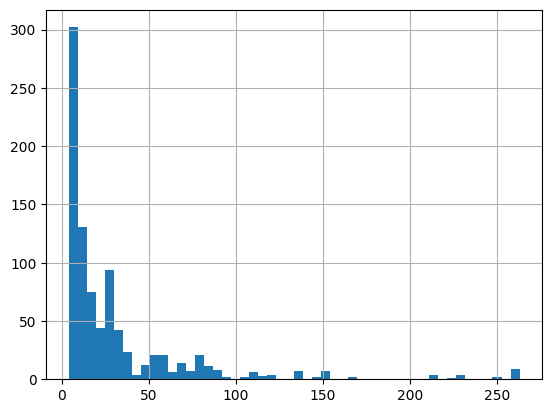

In [261]:
titanic_train_df['Fare'].hist(bins=50)
plt.show()

In [262]:
titanic_train_df["Fare"].describe()

count    891.000000
mean      31.835128
std       43.169017
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      263.000000
Name: Fare, dtype: float64

In [263]:
fare_custom_bins = [0, 4, 7, 14, 31, 100, 263]
titanic_train_df["Fare_binned"] = pd.cut(titanic_train_df["Fare"], bins=fare_custom_bins, labels=["0-4", "4-7", "7-14", "14-31", "31-100", "100-263"])
titanic_train_df = pd.get_dummies(titanic_train_df, columns=["Fare_binned"], dtype=int, drop_first=True)  

In [ ]:
columns_to_exclude = ["PassengerId", "Survived", "Name", "Ticket"]
feature_columns = [col for col in titanic_train_df.columns if col not in columns_to_exclude]
predicted_columns = "Survived"

scaler = StandardScaler()

X = titanic_train_df[feature_columns]
y = titanic_train_df[predicted_columns]

x_scaled = scaler.fit_transform(X)

In [265]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

param_grid = {
    "C": np.logspace(-4, 4, 20), 
    "penalty": ["l1", "l2"],  
    "solver": ["liblinear", "saga"], 
    "max_iter": [1000, 2000, 5000],
}

X_res = scaler.fit_transform(X_res)

logreg = LogisticRegression(class_weight="balanced")
rand_search = RandomizedSearchCV(logreg, param_distributions=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)

rand_search.fit(X_res, y_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [1000, 2000, 5000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   scoring='accuracy', verbose=1)

In [266]:
best_model = rand_search.best_estimator_
y_pred = best_model.predict(X_res)
accuracy = accuracy_score(y_res, y_pred)
print("GridSearchCV Best Accuracy: ", accuracy)

accuracy = accuracy_score(y_res, y_pred)
precision = precision_score(y_res, y_pred)
recall = recall_score(y_res, y_pred)
conf_matrix = confusion_matrix(y_res, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

cv_scores = cross_val_score(logreg, X_res, y_res, cv=5, scoring="accuracy")
print("Cross-validation accuracy scores:", cv_scores)

GridSearchCV Best Accuracy:  0.819672131147541
Accuracy: 0.819672131147541
Precision: 0.831758034026465
Recall: 0.8014571948998178
Confusion Matrix:
 [[460  89]
 [109 440]]
Cross-validation accuracy scores: [0.74545455 0.8        0.8        0.84931507 0.80821918]


Marvelous! This model performed better across all watched metrics. Accuracy rose by 1,6%. Precision by 2,5% which shows less people that survived are showing as dead. Recall rose by 0,02% not much but still improved, better identifies people who truly survived. Also the confusion matrix results are also better or stayed the same. Which mean the cahnges in features only improved model and did not hindrance its  performance.
Cross validation also stayed mostly across different splits which shows there is no overfitting happening and model is generalizing well.

In [337]:
titanic_test_df = pd.read_csv("test.csv")

In [338]:
titanic_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [339]:
def categorize_family_size(size):
    if size == 1:
        return "Single"
    elif 2 <= size <= 3:
        return "SmallFamily"
    else:
        return "LargeFamily"

def preprocessing_df(df: pd.DataFrame)-> pd.DataFrame:
    #First cleaning the age column
    df["Age"] = df["Age"].fillna(df["Age"].median()).round() #Filling the missing values with meadin and rounding them up (meadian -> not affected by outliers)
    df["Is_Baby"] = df["Age"].apply(lambda x: 1 if x == 0 else 0) #Creating category for babies
    df["Is_child"] = df["Age"].apply(lambda x: 1 if x < 15 else 0) #Creating category for kids/child
    #Binning age values in categories for model
    age_custom_bins = [0, 6, 15, 35, 50, 65, 80]
    df["Age_binned"] = pd.cut(df["Age"], bins=age_custom_bins, labels=["0-6", "7-15", "16-35", "36-50", "51-65", "66-80"])
    df = pd.get_dummies(df, columns=["Age_binned"], dtype=int, drop_first=True) #Turns categorical values into 1 and 0
    
    #Changing cabin number into if the passenger has cabin 1 or does not have 0
    df["Cabin"] = df["Cabin"].apply(lambda x: "0" if pd.isna(x) else "1")

    #Changing sex into 1 for Female and 0 for Male
    df["Sex"] = df["Sex"].apply(lambda x: 0 if x == "male" else 1)  

    #Filling missing values based on mode and creating categorical values for each port
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode().iloc[0])
    df = pd.get_dummies(df, columns=["Embarked"], dtype=int, drop_first=True)
    
    #Filling and replacing Fare values by meadina
    df["Fare"] = df.groupby("Pclass")["Fare"].transform(lambda x: x.replace(0, x.median()))
    df["Fare"] = df.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.median()))

    #Capping the value at 263$, because there are multiple values of 263 therefore it is possible max
    df["Fare"] = df["Fare"].apply(lambda x: min(x, 263))

    #Bining fare based on quartils (can be done also with .qcut) 
    fare_custom_bins = [0, 4, 7, 14, 31, 100, 263]
    df["Fare_binned"] = pd.cut(df["Fare"], bins=fare_custom_bins, labels=["0-4", "4-7", "7-14", "14-31", "31-100", "100-263"])
    df = pd.get_dummies(df, columns=["Fare_binned"], dtype=int, drop_first=True)  

    #Counting tickets and their frequencies in dataset
    ticket_counts = df["Ticket"].value_counts()
    df["Ticket_counts"] = df["Ticket"].map(ticket_counts)

    #Determining the size of the family
    df["Family_size"] = df["SibSp"] + df["Parch"] + 1 #Sibling + Parents/child + 1 (for the given passenger)
    df["Family_category"] = df["Family_size"].apply(categorize_family_size)
    df = pd.get_dummies(df, columns=["Family_category"], dtype=int, drop_first=True)  

    return df

In [340]:
titanic_test_df = preprocessing_df(titanic_test_df)

In [341]:
titanic_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_S,Fare_binned_4-7,Fare_binned_7-14,Fare_binned_14-31,Fare_binned_31-100,Fare_binned_100-263,Ticket_counts,Family_size,Family_category_Single,Family_category_SmallFamily
0,892,3,"Kelly, Mr. James",0,34.0,0,0,330911,7.8292,0,...,0,0,1,0,0,0,1,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,...,1,1,0,0,0,0,1,2,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,...,0,0,1,0,0,0,1,1,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,...,1,0,1,0,0,0,1,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,...,1,0,1,0,0,0,1,3,0,1


In [ ]:
columns_to_exclude = ["PassengerId", "Name", "Ticket"]
feature_columns = [col for col in df.columns if col not in columns_to_exclude]

scaler = StandardScaler()

X_test = titanic_test_df[feature_columns]

X_test_scaled = scaler.fit_transform(X_test)

In [335]:
predictions = best_model.predict(X_test_scaled)

In [ ]:
#Saving the predictions for submission
output = pd.DataFrame({
    'PassengerId': titanic_test_df['PassengerId'],
    'Survived': predictions
})

output.to_csv('titanic_predictions.csv', index=False)